In [2]:
# Title:  Naive Bayes

# INSTALL AND LOAD PACKAGES ################################

# Install pacman if you don't have it (uncomment next line)
# install.packages("pacman")

# Install and/or load packages with pacman
pacman::p_load(  # Use p_load function from pacman
  caret,         # Train/test functions
  e1071,         # Machine learning functions
  magrittr,      # Pipes
  naivebayes,    # Naive Bayes functions
  pacman,        # Load/unload packages
  rio,           # Import/export data
  tidyverse      # So many reasons
)

In [3]:
# Set random seed to reproduce the results
set.seed(1)

In [5]:
# LOAD AND PREPARE DATA ####################################

# Use the `spambase` datasets that were created previously 
# in "Spambase.R."

# Import training data `trn`
trn <- import("../data/spambase_trn.rds")

# Import testing data `tst`
tst <- import("../data/spambase_tst.rds")

In [6]:
# MODEL DATA ###############################################

# Control parameters for training
ctrlparam <- trainControl(
  method  = "repeatedcv",   # Repeated cross-validation
  number  = 5,              # Number of folds
  repeats = 3               # Number of sets of folds
)  

In [7]:
# Tuning parameters: set up parameters on search grid
gridparam <- expand.grid(
  laplace = c(0, 0.005, 0.1, 0.5, 0.8, 1.0), 
  usekernel = c(FALSE, TRUE),
  adjust = c(0.1, 0.5))

In [8]:
# Train using training data and control parameters (takes a
# moment)
nb <- train(
  y ~ .,
  data = trn,              # Use training data
  method = "naive_bayes",  # Naive Bayes
  trControl = ctrlparam,   # Control parameters
  tuneGrid = gridparam,    # grid parameters
  na.action = "na.omit",   # Omit missing NA values
  )

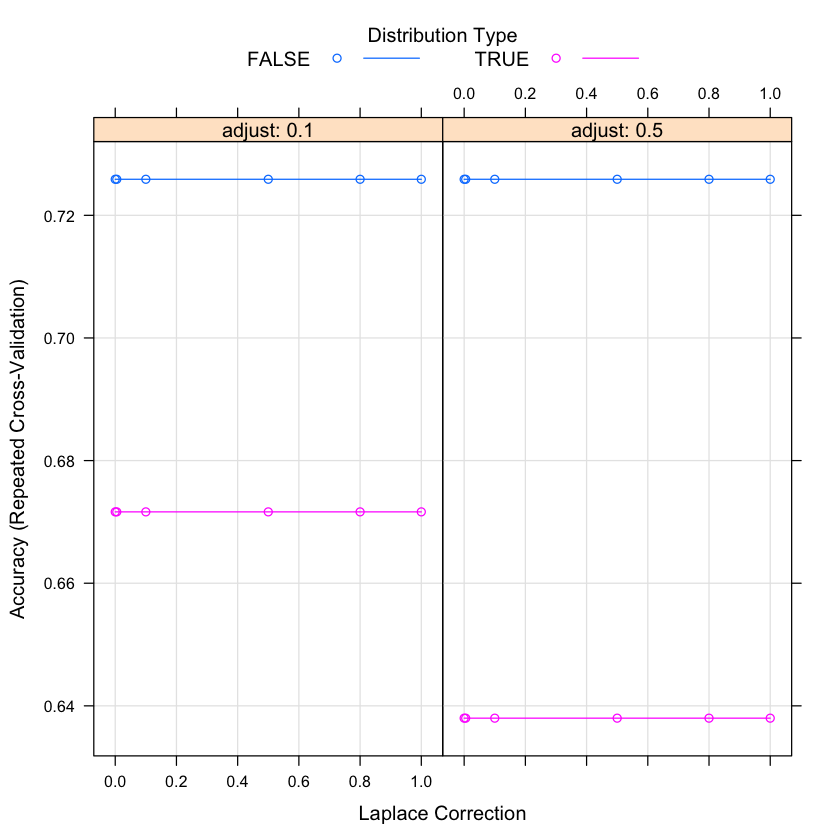

In [9]:
# Plot parameter values against accuracy
nb %>% plot()

In [10]:
# Print the final model
nb %>% print()

Naive Bayes 

3220 samples
  57 predictor
   2 classes: 'NotSpam', 'Spam' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 2576, 2576, 2576, 2576, 2576, 2576, ... 
Resampling results across tuning parameters:

  laplace  usekernel  adjust  Accuracy   Kappa    
  0.000    FALSE      0.1     0.7258799  0.4781098
  0.000    FALSE      0.5     0.7258799  0.4781098
  0.000     TRUE      0.1     0.6716356  0.3935896
  0.000     TRUE      0.5     0.6379917  0.3420924
  0.005    FALSE      0.1     0.7258799  0.4781098
  0.005    FALSE      0.5     0.7258799  0.4781098
  0.005     TRUE      0.1     0.6716356  0.3935896
  0.005     TRUE      0.5     0.6379917  0.3420924
  0.100    FALSE      0.1     0.7258799  0.4781098
  0.100    FALSE      0.5     0.7258799  0.4781098
  0.100     TRUE      0.1     0.6716356  0.3935896
  0.100     TRUE      0.5     0.6379917  0.3420924
  0.500    FALSE      0.1     0.7258799  0.4781098
  0.500    FALSE      0.

In [11]:
# APPLY MODEL TO TEST DATA #################################

# Predict test set with best model
pred <- predict(  # Create new variable ("predicted")
  nb,             # Apply saved model
  newdata = tst   # Use test data
)

In [12]:
# Get the confusion matrix
cm <- pred %>%
  confusionMatrix(reference = tst$y)

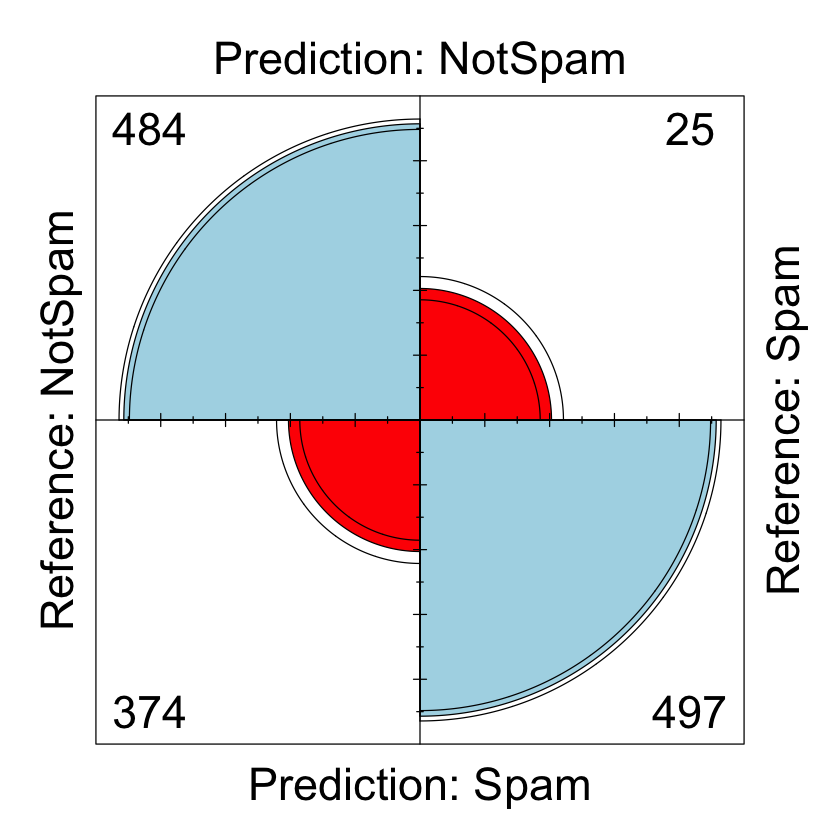

In [13]:
# Plot the confusion matrix
cm$table %>% 
  fourfoldplot(color = c("red", "lightblue"))

In [14]:
# Print the confusion matrix
cm %>% print()

Confusion Matrix and Statistics

          Reference
Prediction NotSpam Spam
   NotSpam     484   25
   Spam        374  497
                                          
               Accuracy : 0.7109          
                 95% CI : (0.6862, 0.7347)
    No Information Rate : 0.6217          
    P-Value [Acc > NIR] : 2.154e-12       
                                          
                  Kappa : 0.4565          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5641          
            Specificity : 0.9521          
         Pos Pred Value : 0.9509          
         Neg Pred Value : 0.5706          
             Prevalence : 0.6217          
         Detection Rate : 0.3507          
   Detection Prevalence : 0.3688          
      Balanced Accuracy : 0.7581          
                                          
       'Positive' Class : NotSpam         
               